Attribute Information 

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [249]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Viewing the initial Melbourne housing dataset.

In [250]:
origianl_melbourne = pd.read_csv("melbourne_data.csv")
origianl_melbourne.head(10).T

,0,1,2,3,4,5,6,7,8,9
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford
Address,85 Turner St,25 Bloomburg St,5 Charles St,40 Federation La,55a Park St,129 Charles St,124 Yarra St,98 Charles St,6/241 Nicholson St,10 Valiant St
Rooms,2,2,3,3,4,2,3,2,1,2
Type,h,h,h,h,h,h,h,h,u,h
Price,1480000.0,1035000.0,1465000.0,850000.0,1600000.0,941000.0,1876000.0,1636000.0,300000.0,1097000.0
Method,S,S,SP,PI,VB,S,S,S,S,S
SellerG,Biggin,Biggin,Biggin,Biggin,Nelson,Jellis,Nelson,Nelson,Biggin,Biggin
Date,3/12/2016,4/02/2016,4/03/2017,4/03/2017,4/06/2016,7/05/2016,7/05/2016,8/10/2016,8/10/2016,8/10/2016
Distance,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
Postcode,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0


Viewing the initial dataset's size.

In [251]:
print(f"Rows: {origianl_melbourne.shape[0]}")
print(f"Columns: {origianl_melbourne.shape[1]}")

Rows: 13580
Columns: 21


Viewing information about the dataset reveals a variety of column data types, including 'object' (textual data) as well as 'integer' and 'float' (numerical data). Notably, there is a large number of missing values in columns like 'BuildingArea' and 'YearBuilt'. 

In [252]:
origianl_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Statistical description

In this statistical description we observe that the average number of rooms as well as bedrooms is approximately 3, with the average bathroom number being 2 indicating the typical configuration of properties. The price ranges from $85,000 to $9,000,000, with a mean price of around $1,075,684 and a significant spread indicated by the standard deviation of $639,311. A larger standard deviation implies greater variability in the data points from the mean. In this dataset, features like Price and BuildingArea exhibit relatively high standard deviations, suggesting significant variability in property prices and sizes. There's a large range in land sizes, with some properties having zero land size and others exceeding 433,000 square meters. This suggests a mix of property types, including apartments and houses with large lots. Additionally, the dataset includes distance information, with properties located within a range of 0 to 48 kilometers from the central business district. The BuildingArea feature provides insight into the size of properties, with values ranging to 44,515 square meters. This indicates a wide range of property sizes within the dataset, including small apartments and large estates. We can also see properties built from 1196 to 2018, with a mean construction year of 1965. This information offers insight into the age distribution of properties and potential trends in architectural styles or building standards over time. The property count ranges from 249 to 21,650, with an average of approximately 7,454 properties in each region. This metric offers insight into the density of properties within different areas and can help identify areas of high or low demand. 

In [253]:
origianl_melbourne.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,3.0,1.0,1.0,2.0,3.0,3.0,10.0
Price,13580.0,1075684.0,639311.0,85000.0,650000.0,903000.0,1330000.0,9000000.0
Distance,13580.0,10.0,6.0,0.0,6.0,9.0,13.0,48.0
Postcode,13580.0,3105.0,91.0,3000.0,3044.0,3084.0,3148.0,3977.0
Bedroom2,13580.0,3.0,1.0,0.0,2.0,3.0,3.0,20.0
Bathroom,13580.0,2.0,1.0,0.0,1.0,1.0,2.0,8.0
Car,13518.0,2.0,1.0,0.0,1.0,2.0,2.0,10.0
Landsize,13580.0,558.0,3991.0,0.0,177.0,440.0,651.0,433014.0
BuildingArea,7130.0,152.0,541.0,0.0,93.0,126.0,174.0,44515.0
YearBuilt,8205.0,1965.0,37.0,1196.0,1940.0,1970.0,1999.0,2018.0


Viewing number of null values for each column.

In [254]:
origianl_melbourne.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Feature selection

Creating a correlation matrix which will allows us to identify the relationships between different features in the dataset. This helps us understand which features are most strongly associated with each other and which ones may have predictive power for our target variable.

In [255]:
numerical_columns = origianl_melbourne.select_dtypes(include=['int64', 'float64'])
numerical_columns.corr().round(2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.00,0.50,0.29,0.06,0.94,0.59,0.41,0.03,0.12,-0.07,0.02,0.10,-0.08
Price,0.50,1.00,-0.16,0.11,0.48,0.47,0.24,0.04,0.09,-0.32,-0.21,0.20,-0.04
Distance,0.29,-0.16,1.00,0.43,0.30,0.13,0.26,0.03,0.10,0.25,-0.13,0.24,-0.05
Postcode,0.06,0.11,0.43,1.00,0.06,0.11,0.05,0.02,0.06,0.03,-0.41,0.45,0.06
Bedroom2,0.94,0.48,0.30,0.06,1.00,0.58,0.41,0.03,0.12,-0.05,0.02,0.10,-0.08
Bathroom,0.59,0.47,0.13,0.11,0.58,1.00,0.32,0.04,0.11,0.15,-0.07,0.12,-0.05
Car,0.41,0.24,0.26,0.05,0.41,0.32,1.00,0.03,0.10,0.10,-0.00,0.06,-0.02
Landsize,0.03,0.04,0.03,0.02,0.03,0.04,0.03,1.00,0.50,0.04,0.01,0.01,-0.01
BuildingArea,0.12,0.09,0.10,0.06,0.12,0.11,0.10,0.50,1.00,0.02,0.04,-0.02,-0.03
YearBuilt,-0.07,-0.32,0.25,0.03,-0.05,0.15,0.10,0.04,0.02,1.00,0.06,-0.00,0.01


In this analysis, several notable observations stand out. The target (Price) likely has a positive correlation with Rooms, Bedroom and Bathroom features as these features tend to be higher in more expensive houses. Conversely, there seems to be a negative correlation between the Price and Distance features indicating that houses which are further away from the city center tend to be cheaper. Additionally, the YearBuilt feature appears to have a negative correlation with the target variable suggesting that the older the property is, the more likely it is to be cheaper.

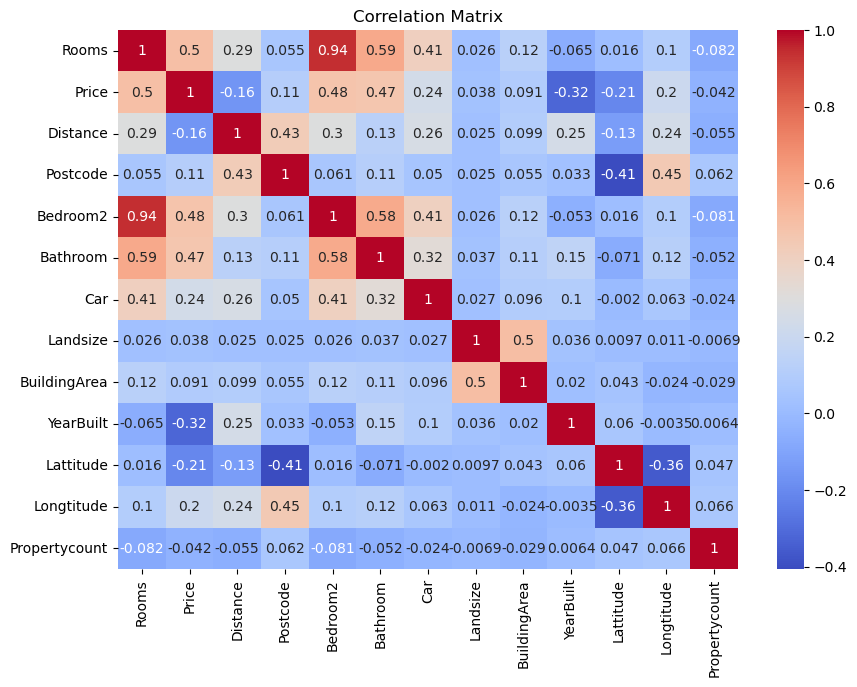

In [256]:
plt.figure(figsize=(10,7))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Removing unnecessary features from dataset as they do not significantly contribute to the predictive power of the model.

In [257]:
removelist = ['CouncilArea', 'Method', 'Date', 'SellerG', 'Address', 'Suburb', 'Postcode']

melbourne = origianl_melbourne.drop(columns=removelist)
melbourne.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0


Viewing current dataset's size.

In [258]:
print(f"Rows: {melbourne.shape[0]}")
print(f"Columns: {melbourne.shape[1]}")

Rows: 13580
Columns: 14


Imputing rows with mean for YearBuilt column due to large number of null values. The mean is chosen because it has been shown to offer the most effective performance in the models compared to using the median or mode.

In [259]:
print(f"YearBuilt Null Values: {melbourne['YearBuilt'].isnull().sum()}")

YearBuilt Null Values: 5375


In [260]:
new_year = origianl_melbourne['YearBuilt'].mean().round()
print("YearBuilt Mean:" , new_year)

YearBuilt Mean: 1965.0


In [261]:
melbourne['YearBuilt'].fillna(new_year, inplace=True)

Imputing rows with mean for BuildingArea column due to large number of null values. The mean is chosen because it has been shown to offer the most effective performance in the models compared to using the median or mode.

In [262]:
print(f"BuildingArea Null Values: {melbourne['BuildingArea'].isnull().sum()}")

BuildingArea Null Values: 6450


In [263]:
new_building_area = origianl_melbourne['BuildingArea'].mean().round()
print("BuildingArea Mean:" , new_building_area)

BuildingArea Mean: 152.0


In [264]:
melbourne['BuildingArea'].fillna(new_building_area, inplace=True)

Presenting YearBuilt and BuildingArea distributions before and after imputation on histogram.

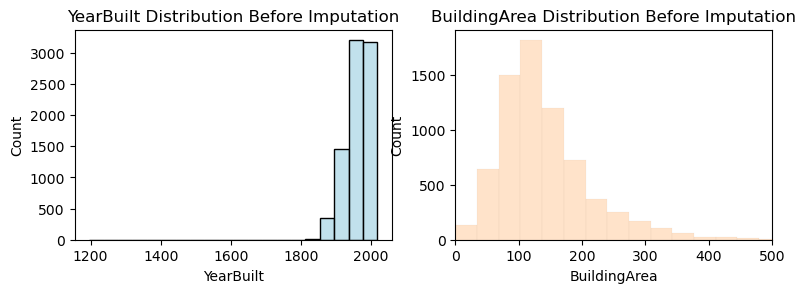

In [265]:
plt.figure(figsize=(9, 6))
plt.subplot(2, 2, 1)
sns.histplot(origianl_melbourne['YearBuilt'], color='lightblue', bins=20)
plt.title('YearBuilt Distribution Before Imputation')

plt.subplot(2, 2, 2)
sns.histplot(origianl_melbourne['BuildingArea'], color='peachpuff', bins=1300)
plt.title('BuildingArea Distribution Before Imputation')
plt.xlim(0, 500)
plt.show()

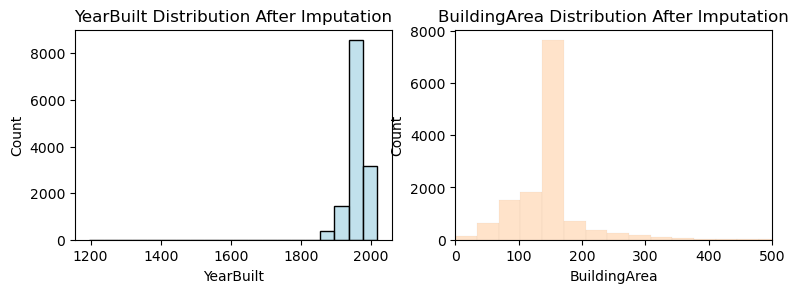

In [266]:
plt.figure(figsize=(9, 6))
plt.subplot(2, 2, 3)
sns.histplot(melbourne['YearBuilt'], color='lightblue', bins=20)
plt.title('YearBuilt Distribution After Imputation')
plt.xlabel('YearBuilt')

plt.subplot(2, 2, 4)
sns.histplot(melbourne['BuildingArea'], color='peachpuff', bins=1300)
plt.title('BuildingArea Distribution After Imputation')
plt.xlabel('BuildingArea')
plt.xlim(0, 500)
plt.show()

Feature Engineering

Creating YearBuiltRange column which will provide a categorical view beneficial for interpetation.

In [267]:
print("Year Ranges\n")
print(f"Earlier than 1850: {melbourne[melbourne['YearBuilt'] < 1850].shape[0]}")
print(f"Between 1850 and 1900: {melbourne[(melbourne['YearBuilt'] > 1850) & (melbourne['YearBuilt'] < 1900)].shape[0]}")
print(f"Between 1900 and 1950: {melbourne[(melbourne['YearBuilt'] > 1900) & (melbourne['YearBuilt'] < 1950)].shape[0]}")
print(f"Between 1950 and 2000: {melbourne[(melbourne['YearBuilt'] > 1950) & (melbourne['YearBuilt'] < 2000)].shape[0]}")
print(f"Later than 2000: {melbourne[melbourne['YearBuilt'] > 2000].shape[0]}")

Year Ranges

Earlier than 1850: 2
Between 1850 and 1900: 362
Between 1900 and 1950: 1443
Between 1950 and 2000: 8812
Later than 2000: 1736


In [268]:
year_bins = [1850, 1900, 1950, 2000, np.inf]
year_labels = ['1850-1900', '1900-1950', '1950-2000', '>2000']

melbourne['YearBuiltRange'] = pd.cut(melbourne['YearBuilt'], bins=year_bins, labels=year_labels, right=False)

melbourne.head()


,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,YearBuiltRange
0,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,152.0,1965.0,-37.7996,144.9984,Northern Metropolitan,4019.0,1950-2000
1,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,1900-1950
2,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0,1900-1950
3,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,152.0,1965.0,-37.7969,144.9969,Northern Metropolitan,4019.0,1950-2000
4,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0,>2000


Performing one-hot encoding for the YearBuiltRange column for easier and more effective model interpretation, analysis and prediction.

In [269]:
melbourne = pd.get_dummies(melbourne, columns=['YearBuiltRange'])
melbourne.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,YearBuiltRange_1850-1900,YearBuiltRange_1900-1950,YearBuiltRange_1950-2000,YearBuiltRange_>2000
0,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,152.0,1965.0,-37.7996,144.9984,Northern Metropolitan,4019.0,False,False,True,False
1,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,False,True,False,False
2,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0,False,True,False,False
3,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,152.0,1965.0,-37.7969,144.9969,Northern Metropolitan,4019.0,False,False,True,False
4,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False,True


Modifying titles for readability.

In [270]:
melbourne.loc[:, 'Type'] = melbourne['Type'].replace({
    'br': 'Bedroom(s)',
    'h': 'House',
    'u': 'Unit',
    't': 'Townhouse',
    'dev site': 'Development site',
    'o res': 'Other residential'
})

melbourne.rename(columns={'Bedroom2': 'Bedroom'}, inplace=True)

Assuming that all properties of type House and Townhouse have a yard (Landsize isn't null).

Removing properties that don't fit in this category.

In [271]:
print(f"All property landsize null count: {len(melbourne[melbourne['Landsize'] == 0])}")
print(f"House and townhouse landsize null count: {len(melbourne[((melbourne['Landsize'] == 0) & (melbourne['Type'] == 'House')) | ((melbourne['Landsize'] == 0) & (melbourne['Type'] == 'Townhouse'))])}")

All property landsize null count: 1939
House and townhouse landsize null count: 310


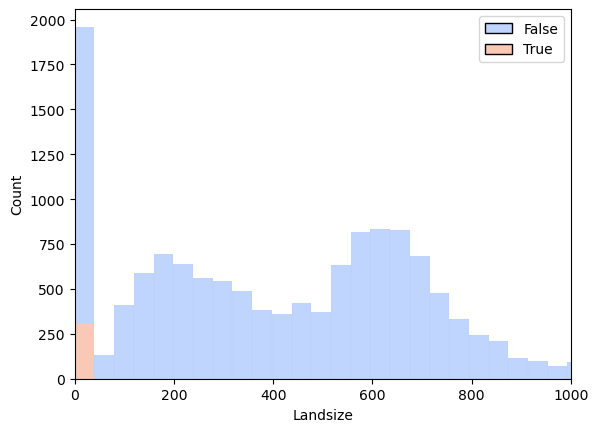

In [272]:
sns.histplot(melbourne, x='Landsize', hue=((melbourne['Landsize'] == 0) & ((melbourne['Type'] == 'House') | (melbourne['Type'] == 'Townhouse'))), palette='coolwarm', multiple='stack')
plt.xlim(0, 1000)
plt.show()

In [273]:
melbourne = melbourne[~(((melbourne['Landsize'] == 0) & (melbourne['Type'] == 'House')) | ((melbourne['Landsize'] == 0) & (melbourne['Type'] == 'Townhouse')))]

Performing one-hot encoding for Type column for easier and more effective model interpretation, analysis and prediction.

In [274]:
melbourne['Type'].unique()

array(['House', 'Unit', 'Townhouse'], dtype=object)

In [275]:
melbourne = pd.get_dummies(melbourne, columns=['Type'])
melbourne.head()

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,YearBuiltRange_1850-1900,YearBuiltRange_1900-1950,YearBuiltRange_1950-2000,YearBuiltRange_>2000,Type_House,Type_Townhouse,Type_Unit
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,152.0,1965.0,-37.7996,144.9984,Northern Metropolitan,4019.0,False,False,True,False,True,False,False
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,False,True,False,False,True,False,False
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0,False,True,False,False,True,False,False
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,152.0,1965.0,-37.7969,144.9969,Northern Metropolitan,4019.0,False,False,True,False,True,False,False
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False,True,True,False,False


Performing one-hot encoding for Regionname column for easier and more effective model interpretation, analysis and prediction.

In [276]:
melbourne['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [277]:
melbourne = pd.get_dummies(melbourne, columns=['Regionname'])
melbourne.head()

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Type_Townhouse,Type_Unit,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,152.0,1965.0,-37.7996,...,False,False,False,False,True,False,False,False,False,False
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,...,False,False,False,False,True,False,False,False,False,False
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,...,False,False,False,False,True,False,False,False,False,False
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,152.0,1965.0,-37.7969,...,False,False,False,False,True,False,False,False,False,False
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,...,False,False,False,False,True,False,False,False,False,False


Removing entries with missing values.

In [278]:
melbourne.isnull().sum()

Rooms                                     0
Price                                     0
Distance                                  0
Bedroom                                   0
Bathroom                                  0
Car                                      62
Landsize                                  0
BuildingArea                              0
YearBuilt                                 0
Lattitude                                 0
Longtitude                                0
Propertycount                             0
YearBuiltRange_1850-1900                  0
YearBuiltRange_1900-1950                  0
YearBuiltRange_1950-2000                  0
YearBuiltRange_>2000                      0
Type_House                                0
Type_Townhouse                            0
Type_Unit                                 0
Regionname_Eastern Metropolitan           0
Regionname_Eastern Victoria               0
Regionname_Northern Metropolitan          0
Regionname_Northern Victoria    

In [279]:
melbourne = melbourne.dropna()
melbourne.shape

(13208, 27)

Confirming there are no more missing values in dataset.

In [280]:
melbourne.isnull().sum()

Rooms                                    0
Price                                    0
Distance                                 0
Bedroom                                  0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
YearBuiltRange_1850-1900                 0
YearBuiltRange_1900-1950                 0
YearBuiltRange_1950-2000                 0
YearBuiltRange_>2000                     0
Type_House                               0
Type_Townhouse                           0
Type_Unit                                0
Regionname_Eastern Metropolitan          0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_

Outlier Removal

Viewing current dataset's  size.

In [281]:
print(f"Rows: {melbourne.shape[0]}")
print(f"Columns: {melbourne.shape[1]}")

Rows: 13208
Columns: 27


Visualizing distribution of numerical variables before outlier removal.

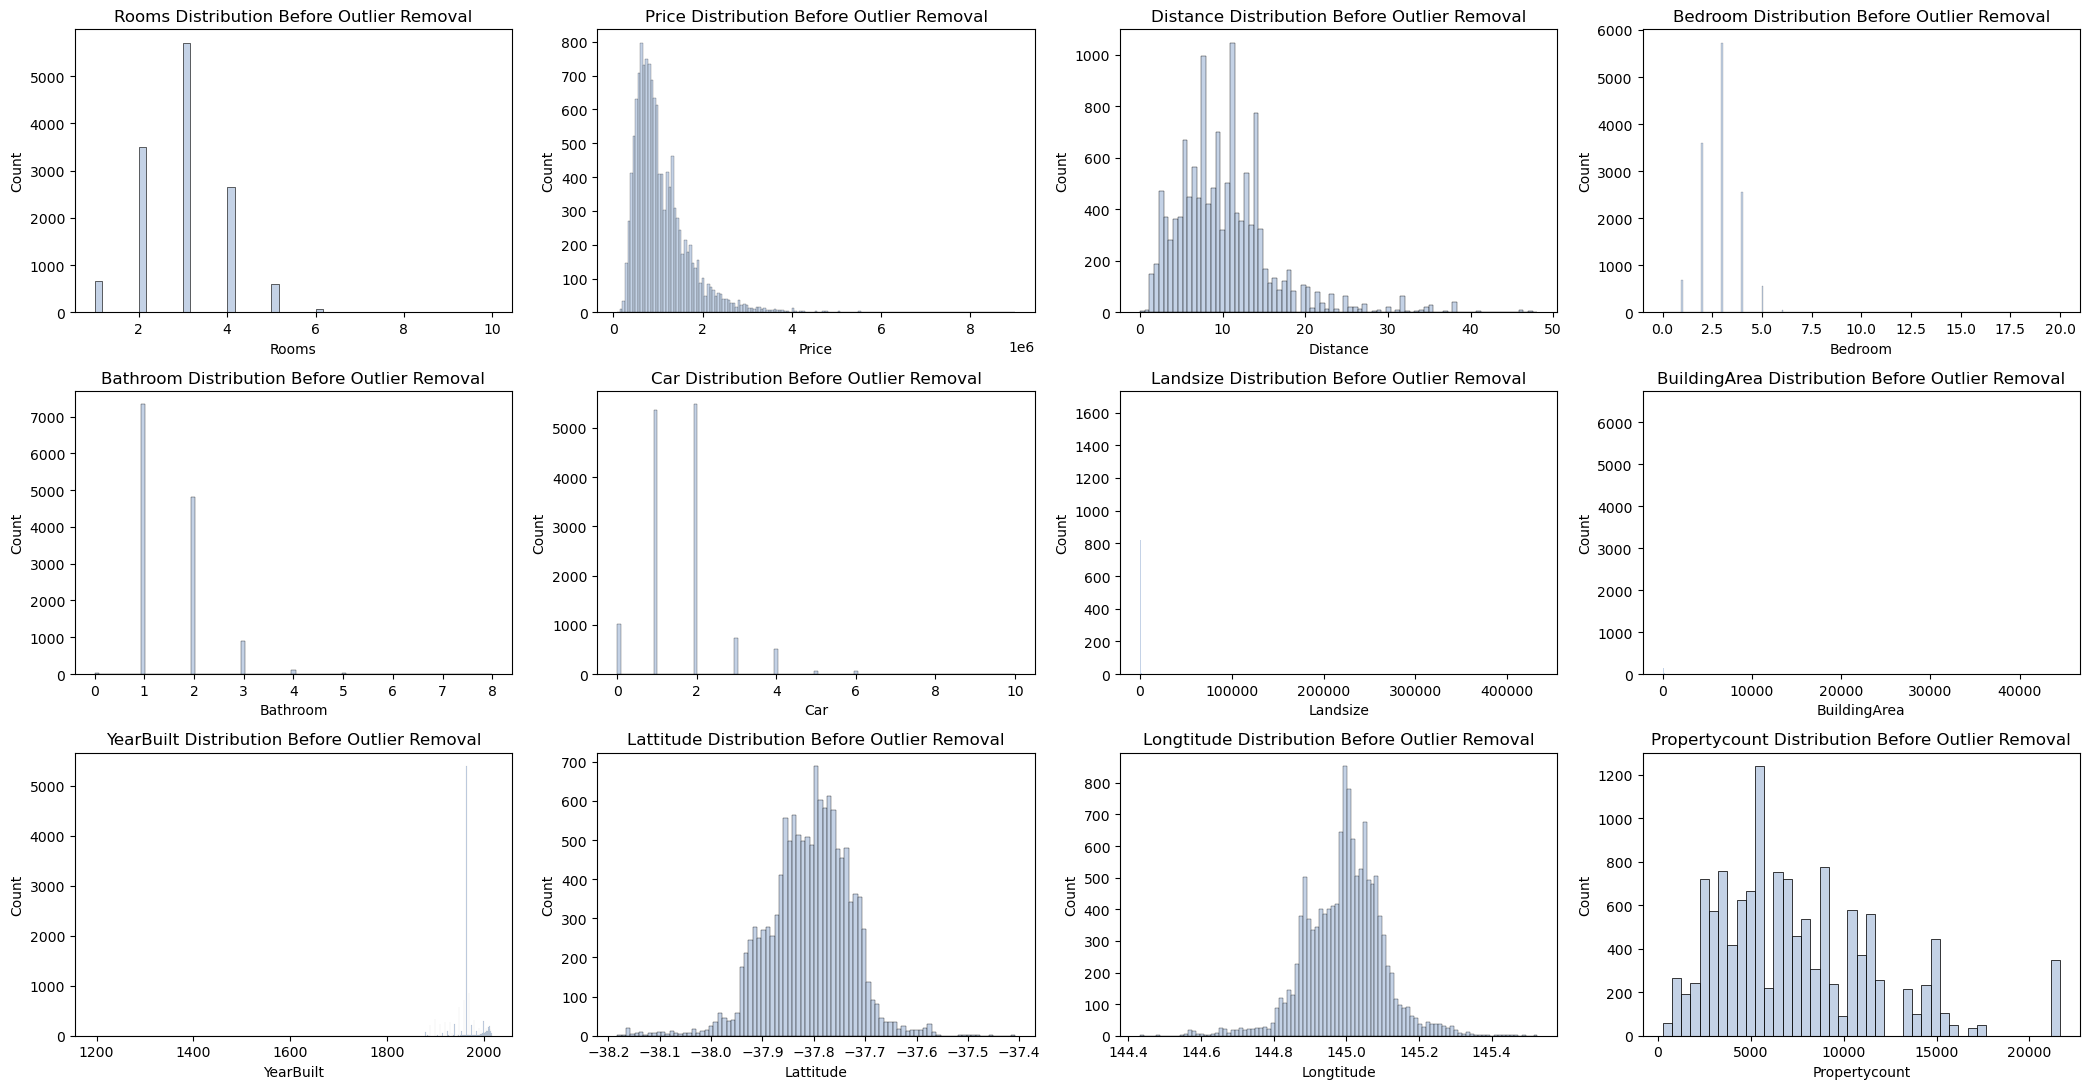

In [282]:
numerical_features = ['Rooms', 'Price', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

plt.figure(figsize=(21, 11))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(melbourne[feature], color='lightsteelblue')
    plt.title(f'{feature} Distribution Before Outlier Removal')

plt.tight_layout()
plt.show()

Identifying and removing possible outliers using Z-Score method.

In [283]:
def z_scores_outliers(melbourne, columns, threshold=3):
    outlier_indices = []

    for column in columns:
        z_scores = np.abs(stats.zscore(melbourne[column]))
        outlier_list = melbourne[z_scores > threshold].index
        outlier_indices.extend(outlier_list)

    outlier_indices = list(set(outlier_indices))  

    return outlier_indices

In [284]:
melbourne.loc[z_scores_outliers(melbourne, columns=['Rooms','Price','Distance','Bedroom','Bathroom','Car','Landsize','BuildingArea', 'YearBuilt','Lattitude','Longtitude', 'Propertycount', 'Type_House' ,'Type_Townhouse', 'Type_Unit', 'Regionname_Eastern Victoria',	'Regionname_Northern Metropolitan',	'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria', 'YearBuiltRange_1850-1900', 'YearBuiltRange_1900-1950',	'YearBuiltRange_1950-2000', 'YearBuiltRange_>2000'], threshold=3)]

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Type_Townhouse,Type_Unit,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,...,False,False,False,False,True,False,False,False,False,False
8201,4,1425000.0,11.8,4.0,2.0,2.0,314.0,189.0,2000.0,-37.9084,...,True,False,False,False,False,False,False,True,False,False
8204,4,3970000.0,2.6,4.0,3.0,1.0,289.0,152.0,1965.0,-37.7959,...,False,False,False,False,True,False,False,False,False,False
8205,3,2790000.0,2.6,3.0,2.0,1.0,180.0,120.0,1890.0,-37.7961,...,False,False,False,False,True,False,False,False,False,False
15,2,1310000.0,2.5,2.0,1.0,2.0,238.0,97.0,1890.0,-37.8090,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,4,2337000.0,8.4,4.0,2.0,3.0,580.0,222.0,1890.0,-37.8477,...,False,False,False,False,False,False,False,False,True,False
8145,3,1100000.0,8.4,3.0,1.0,6.0,761.0,152.0,1965.0,-37.8464,...,False,False,False,False,False,False,False,False,True,False
8155,3,800000.0,11.2,3.0,2.0,2.0,202.0,151.0,2015.0,-37.7418,...,True,False,False,False,False,False,False,False,True,False
8166,4,1822000.0,5.5,4.0,1.0,8.0,728.0,152.0,1900.0,-37.7825,...,False,False,False,False,True,False,False,False,False,False


In [285]:
melbourne = melbourne.drop(z_scores_outliers(melbourne, columns=['Rooms','Price','Distance','Bedroom','Bathroom','Car','Landsize','BuildingArea', 'YearBuilt','Lattitude','Longtitude', 'Propertycount', 'Type_House' ,'Type_Townhouse', 'Type_Unit', 'Regionname_Eastern Victoria',	'Regionname_Northern Metropolitan',	'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria', 'YearBuiltRange_1850-1900', 'YearBuiltRange_1900-1950',	'YearBuiltRange_1950-2000', 'YearBuiltRange_>2000']),  axis = 0).reset_index(drop = True)

Identifying and removing possible outliers using Interquartile Range (IQR) method.

In [286]:
def iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~((data[column] >= lower_bound) & (data[column] <= upper_bound))

outliers_rooms = iqr_outliers(melbourne.copy(), 'Rooms')
outliers_price = iqr_outliers(melbourne.copy(), 'Price')
outliers_landsize = iqr_outliers(melbourne.copy(), 'Landsize')

combined_outliers = outliers_rooms | outliers_price | outliers_landsize 

melbourne = melbourne[~combined_outliers] 

Visualizing distribution of numerical variables after outlier removal.

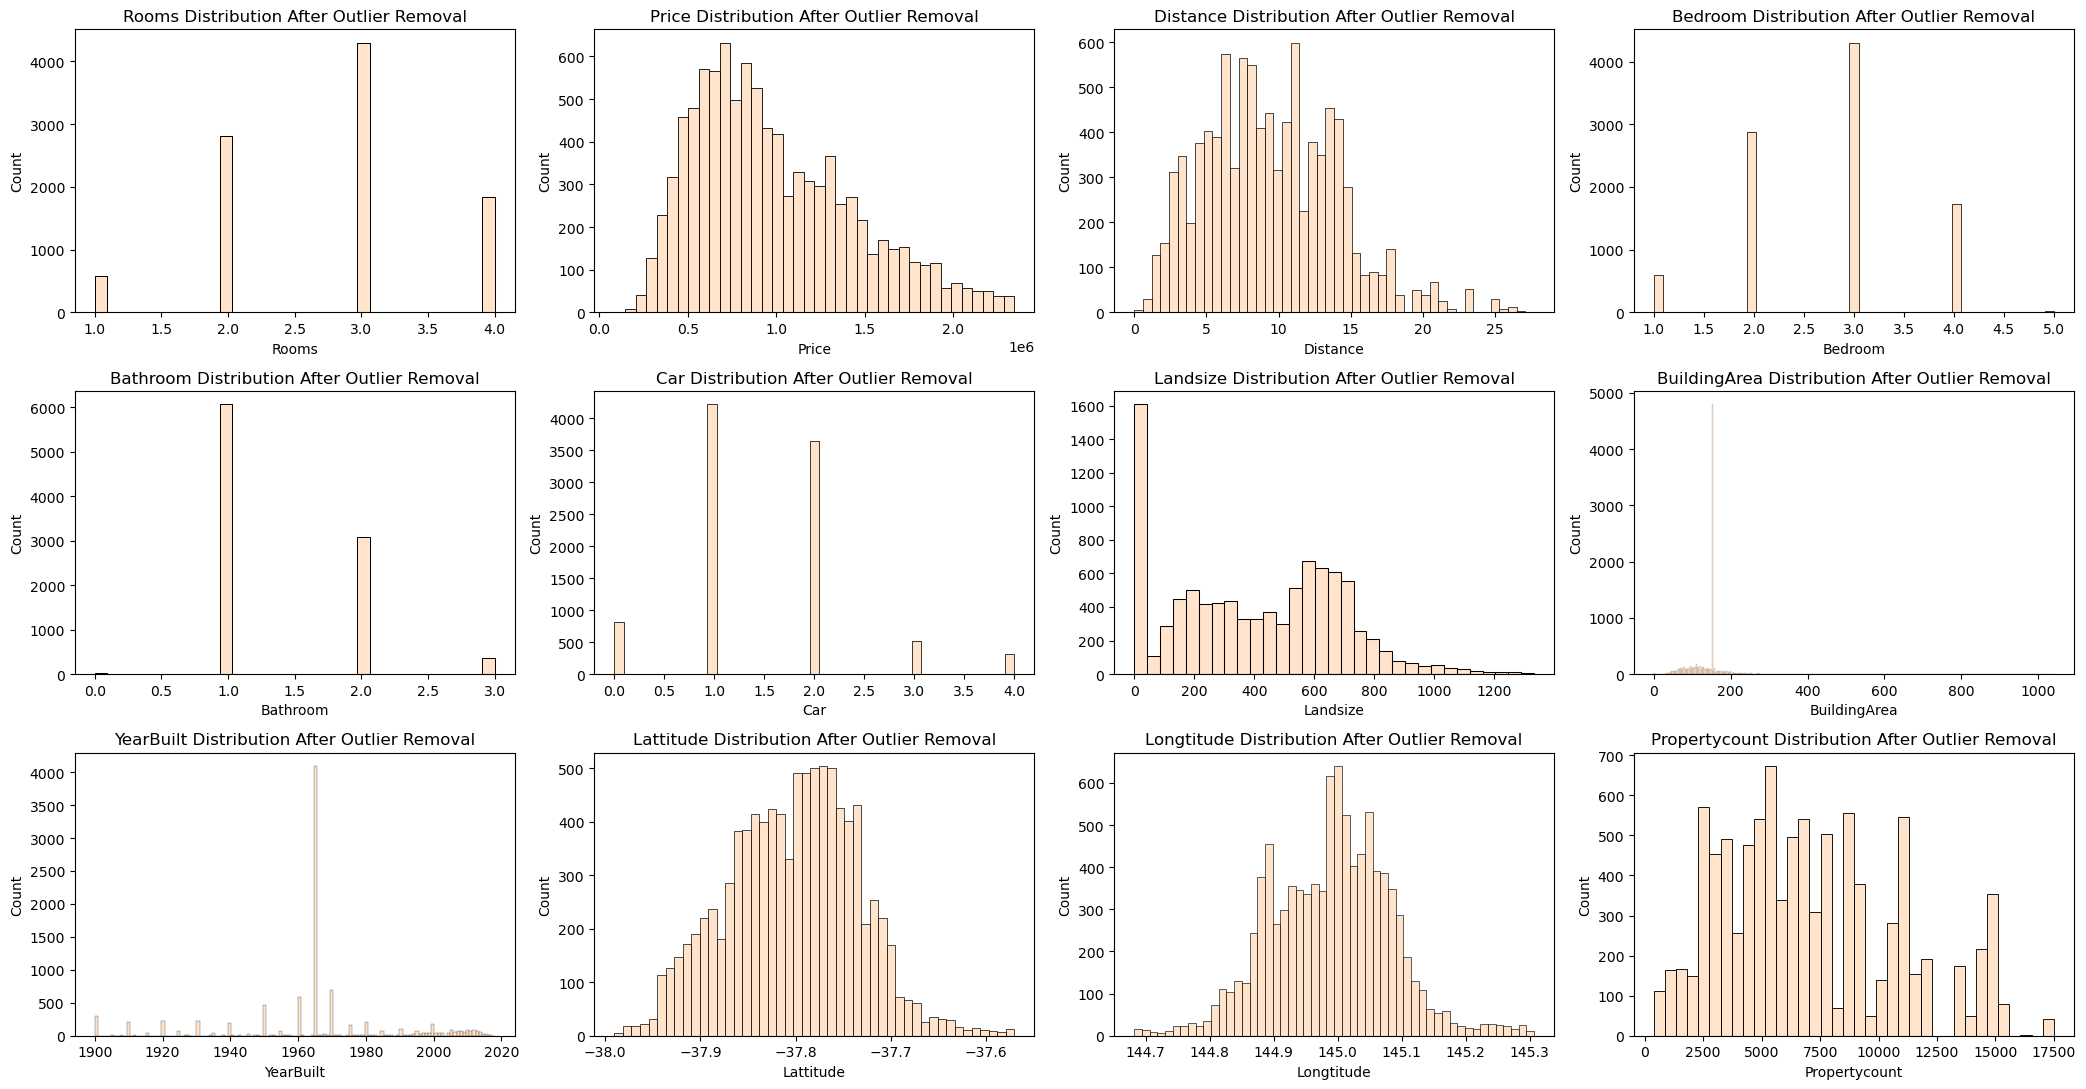

In [287]:
plt.figure(figsize=(21, 11))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(melbourne[feature], color='peachpuff')
    plt.title(f'{feature} Distribution After Outlier Removal')

plt.tight_layout()
plt.show()

Viewing one-hot encoded columns with only False entries. These columns have no usable data that is why we are removing them.

In [288]:
false_columns = melbourne.columns[(melbourne == False).all()]

print("Columns with only False entries:")
print(false_columns)

melbourne = melbourne.drop(columns=false_columns)

Columns with only False entries:
Index(['YearBuiltRange_1850-1900', 'Type_Townhouse',
       'Regionname_Eastern Victoria', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan', 'Regionname_Western Victoria'],
      dtype='object')


Viewing current dataset's size.

In [289]:
print(f"Rows: {melbourne.shape[0]}")
print(f"Columns: {melbourne.shape[1]}")

Rows: 9520
Columns: 21


Data visualization

<Axes: xlabel='Price', ylabel='Count'>

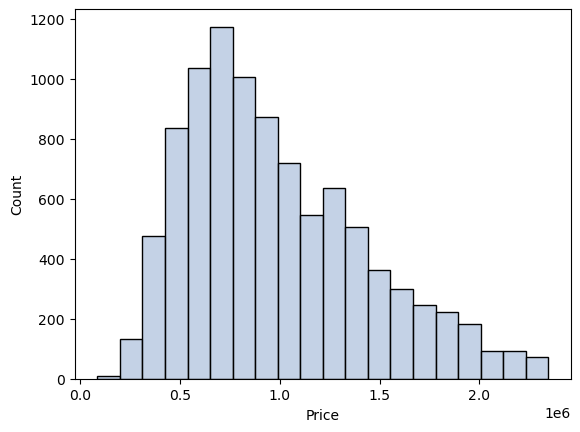

In [290]:
sns.histplot(data=melbourne, x='Price', color='lightsteelblue', bins=20)

This histogram shows the distribution of house prices in Melbourne, Australia. We can see that most houses in Melbourne fall within a price range of 0.5 to 1.5 million AUD. This indicates that a significant portion of the housing market caters to the mid-range affordability segment. There's a smaller but steady number of houses priced between 2 and 3 million dollars, suggesting a market for higher-end properties as well.

(0.0, 1000.0)

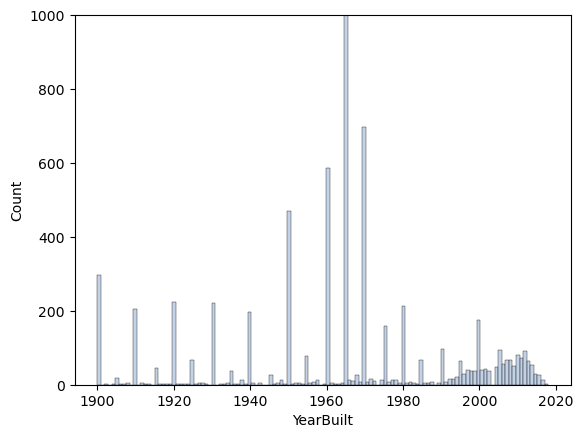

In [291]:
sns.histplot(data=melbourne, x='YearBuilt', color='lightsteelblue')
plt.ylim(0, 1000)

This histogram focuses on the distribution of the years the properties were built. With this plot we can identify multiple periods with significant building activity. For instance, there could be a prominent peak in an earlier era, perhaps reflecting a post-war housing boom or a period of rapid urban development. Additionally, the recent construction surge around the year 2000 is evident followed by a sustained level of high construction output for at least the next decade.

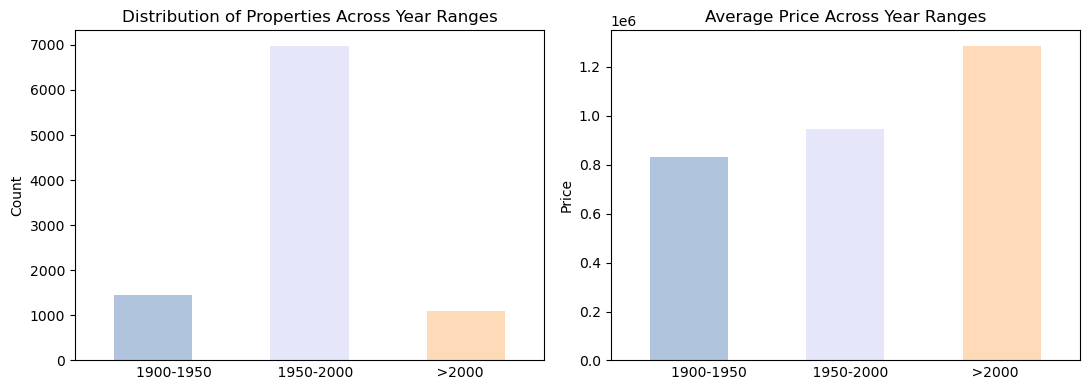

In [292]:
year_range_counts = melbourne[['YearBuiltRange_1900-1950', 'YearBuiltRange_1950-2000', 'YearBuiltRange_>2000']].sum()
year_range_prices = melbourne.groupby(['YearBuiltRange_1900-1950', 'YearBuiltRange_1950-2000', 'YearBuiltRange_>2000'])['Price'].mean()

plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
year_range_counts.plot(kind='bar', stacked=True, color=['lightsteelblue', 'lavender', 'peachpuff'])
plt.title('Distribution of Properties Across Year Ranges')
plt.xlabel('1900-1950               1950-2000                   >2000')
plt.ylabel('Count')
plt.xticks([])

plt.subplot(1, 2, 2)
year_range_prices.plot(kind='bar', stacked=True, color=['lightsteelblue', 'lavender', 'peachpuff'])
plt.title('Average Price Across Year Ranges')
plt.ylabel('Price')
plt.xlabel('1900-1950               1950-2000                   >2000')
plt.xticks([])
plt.tight_layout()
plt.show()

The left side shows a barplot representing the distribution of properties across different age ranges. We can observe that a significant portion of houses in Melbourne fall within the 1950-2000 range. This suggests a large stock of mid-aged housing in the city. 

The right side shows a barplot representing the average sale price for houses within each age range. Upon observation, a clear trend emerges: the price tends to directly correlate with age, suggesting that newer properties built after the year 2000 tend to command higher average prices compared to older ones. This hints at a preference for more modern homes. However, it is important to note that there could be very expensive older houses or affordable newer houses depending on other characteristics.

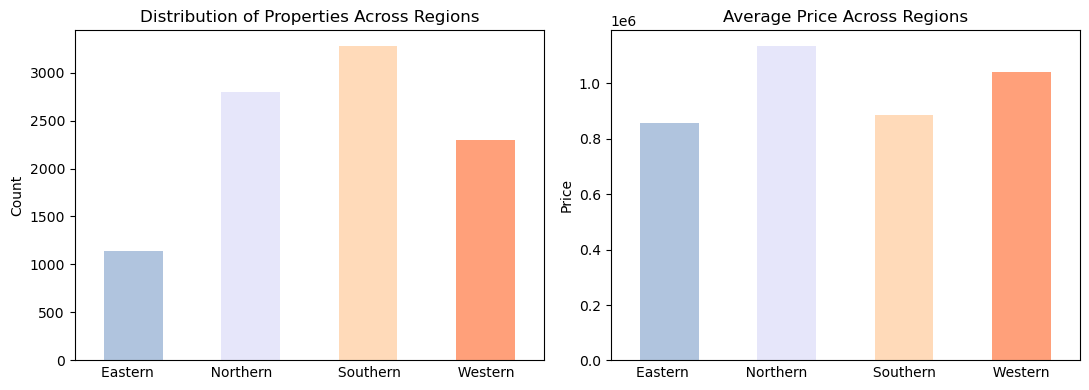

In [293]:
region_counts = melbourne[['Regionname_Eastern Metropolitan', 'Regionname_Northern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan']].sum()
region_prices = melbourne.groupby(['Regionname_Eastern Metropolitan', 'Regionname_Northern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan'])['Price'].mean()

plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
region_counts.plot(kind='bar', stacked=True, color=['lightsteelblue', 'lavender', 'peachpuff', 'lightsalmon'])
plt.title('Distribution of Properties Across Regions')
plt.xlabel('Eastern             Northern               Southern             Western ')
plt.xticks([])
plt.ylabel('Count')

plt.subplot(1, 2, 2)
region_prices.plot(kind='bar', stacked=True, color=['lightsteelblue', 'lavender', 'peachpuff', 'lightsalmon'])
plt.title('Average Price Across Regions')
plt.ylabel('Price')
plt.xlabel('Eastern             Northern               Southern             Western ')
plt.xticks([])
plt.tight_layout()
plt.show()

The left side shows a barplot representing the distribution of properties across different metropolitan regions. We can see a significant concentration of properties in the Southern, Northern, and Western regions, while the Eastern region holds considerably fewer properties. 

The right side shows a barplot representing the average sale price for properties within each metropolitan region. Interestingly, despite some variation, all metropolitan regions appear to have relatively similar average sale prices. Notably, the Northern region stands out with the highest average, exceeding 1 million AUD. Following closely behind is the Western region. This suggests that while location may play a role in property value within Melbourne, the overall difference in sale price between regions might not be as significant as other factors influencing property value.

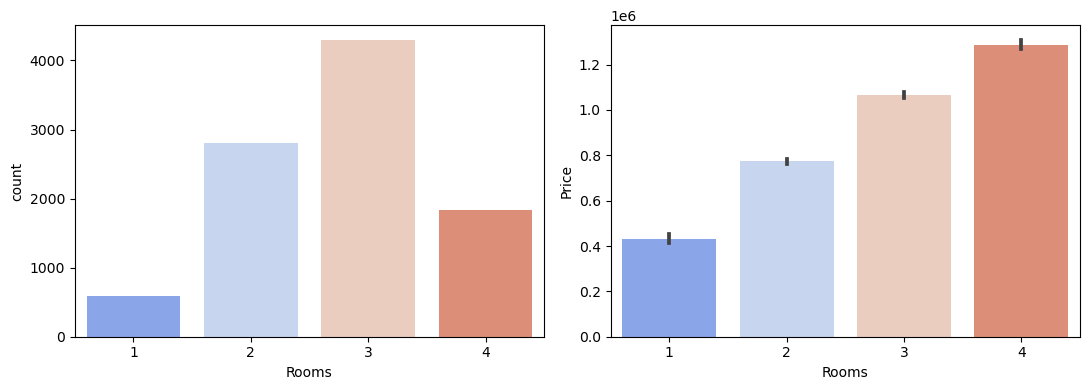

In [294]:
plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
sns.countplot(data=melbourne, x='Rooms', palette='coolwarm')
plt.subplot(1, 2, 2)
sns.barplot(data=melbourne, x='Rooms', y='Price', palette='coolwarm')
plt.tight_layout()
plt.show()

The first visualization shows a countplot representing the distribution of properties according to the number of rooms. We can observe that most commonly properties have 3 rooms, followed by properties with 2 rooms. This suggests a prevalence of smaller properties within the dataset. 

The second visualization is a bar chart depicting the average sale price of properties according to the number of rooms. Here, we see an interesting trend. The average price appears to increase steadily along with the number of rooms, reaching its peak at properties with 4 rooms. This suggests that properties with a higher number of rooms tend to command higher average sale prices.

<Axes: xlabel='Type', ylabel='count'>

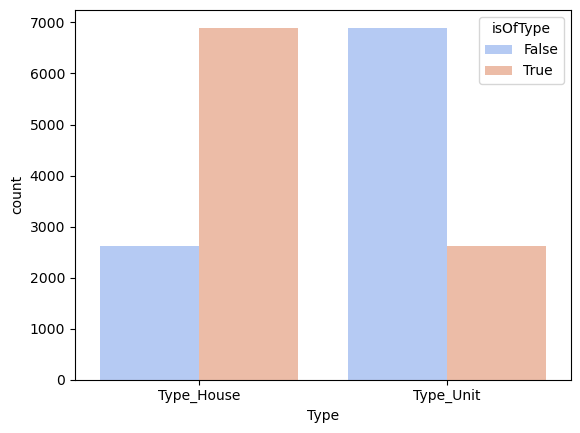

In [295]:
melbourne_melted = melbourne.melt(value_vars=['Type_House', 'Type_Unit'], var_name='Type', value_name='isOfType')
sns.countplot(data=melbourne_melted, x='Type', hue='isOfType', palette='coolwarm')

The countplot illustrates the distribution of property types within the dataset, distinguishing between House and Unit types. It is evident that the dataset predominantly comprises houses, with almost 7000 instances, while units represent a smaller proportion, totaling a little over 2600 entries.

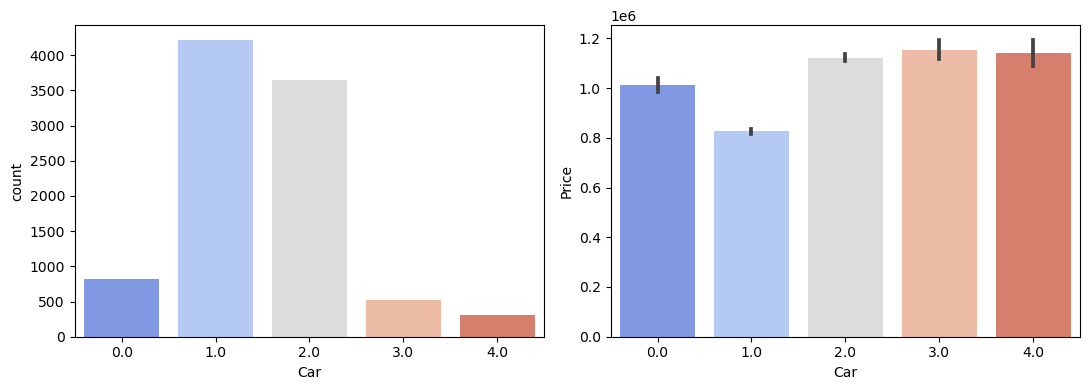

In [296]:
plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
sns.countplot(data=melbourne, x='Car', palette='coolwarm')
plt.subplot(1, 2, 2)
sns.barplot(data=melbourne, x='Car', y='Price', palette='coolwarm')
plt.tight_layout()
plt.show()

The first visualization shows a countplot representing the distribution of properties according to the number of parking spots. We can observe that most commonly properties have 1 parking spot, closely followed by properties with 2 parking spots. 

The second visualization presents a bar chart illustrating the average sale prices of properties categorized by the number of parking spots. The analysis indicates a lack of significant correlation between the presence of parking spots and property prices. This suggests that the demand for properties as well as the cost remain consistent regardless of parking availability. Notably, properties with four parking spots demonstrate similar price ranges to those with two parking spots, while properties without parking even command prices higher than those with only one spot. This could be due to other factors such as location of the property.

Model Training

Separating features (X) and target variable (y).

In [297]:
X = melbourne.drop(['Price'], axis=1)
X.head()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,YearBuiltRange_1900-1950,YearBuiltRange_1950-2000,YearBuiltRange_>2000,Type_House,Type_Unit,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
0,2,2.5,2.0,1.0,1.0,202.0,152.0,1965.0,-37.7996,144.9984,4019.0,False,True,False,True,False,False,True,False,False
1,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,True,False,False,True,False,False,True,False,False
2,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,True,False,False,True,False,False,True,False,False
3,3,2.5,3.0,2.0,1.0,94.0,152.0,1965.0,-37.7969,144.9969,4019.0,False,True,False,True,False,False,True,False,False
4,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,False,False,True,True,False,False,True,False,False


In [298]:
y = melbourne['Price']
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

Splitting the data into training and testing sets (80% training, 20% testing).

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Performing normalization with the goal of standardizing the scale of features.

In [300]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Beginning the modeling process, Linear Regression was chosen as a foundational benchmark due to its simplicity and interpretability, followed by the progression to more sophisticated models, namely, Random Forest and Decision Trees which offer greater flexibility in capturing complex relationships within the data. For tree-based models like Random Forest and Decision Trees, hyperparameter tuning is performed using GridSearchCV to optimize their performance. After training and hyperparameter tuning, it is ensured that the best parameters are tuned for each model. Finally, the models are evaluated on the test set and evaluation metrics including R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are printed to compare the performance of each model. 

The models' R2 scores indicate how well they explain the variance in housing prices, with higher scores suggesting better performance. Starting off with the lowest score is the Linear Regression model achieving an R2 score of 69%. Followed by the Decision Trees model which falls between the other two, with an R2 score of 76%. Finally, the Random Forest model is the best performing model with an R2 score of 84%.

In terms of error metrics like MAE, MSE, and RMSE, lower values are preferable. Random Forest has the lowest errors, implying its predictions are closest to the actual prices. Decision Trees follow with slightly higher errors, and Linear Regression has the highest errors among the models.

In [301]:
param_grid_rf = {
    'max_depth': [None, 2],
    'min_samples_split': [5, 7],
    'min_samples_leaf': [2, 5], 
    'n_estimators': [250, 300], 
    'max_leaf_nodes': [2650, 2700] 
}

param_grid_dt = {
    'max_depth': [15, 20],
    'min_samples_split': [35, 40],
    'min_samples_leaf': [15, 20], 
    'max_leaf_nodes': [7600, 7700] 
}

models = {
    'Linear Regression': LinearRegression(), 
    'Random Forest': RandomForestRegressor(),
    'Decision Trees': DecisionTreeRegressor()
}

param_grids = {
    'Random Forest': param_grid_rf,
    'Decision Trees': param_grid_dt,
}

model_names = []

for model_name, model_instance in models.items():
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model_instance, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        models[model_name] = best_estimator

        print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    else:
        model_instance.fit(X_train, y_train)

for model_name, model_instance in models.items():
    y_pred = model_instance.predict(X_test)
    mae = round(mean_absolute_error(y_test, y_pred))
    mse = round(mean_squared_error(y_test, y_pred))
    rmse = round(np.sqrt(mse))
    r2 = round(r2_score(y_test, y_pred) * 100)

    print(f"\n{model_name} Metrics:")
    print(f"R2 Score: {r2}%")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)



Best parameters for Random Forest: {'max_depth': None, 'max_leaf_nodes': 2700, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Best parameters for Decision Trees: {'max_depth': 15, 'max_leaf_nodes': 7700, 'min_samples_leaf': 15, 'min_samples_split': 35}

Linear Regression Metrics:
R2 Score: 69%
MAE: 192792
MSE: 62177925439
RMSE: 249355

Random Forest Metrics:
R2 Score: 84%
MAE: 126836
MSE: 32805096552
RMSE: 181122

Decision Trees Metrics:
R2 Score: 76%
MAE: 153993
MSE: 47675912217
RMSE: 218348


Visualizing the comparison of the actual prices vs predicted prices for each model.

Linear Regression: The scatter plot indicates a positive correlation between the actual and predicted prices, with a concentration of points along the reference line. We can observe that predictions are generally close to the actual values. However, there is a noticeable spread, indicating that while the model performs reasonably well, there are some deviations, especially at higher price ranges.

Random Forest: This plot also shows a strong positive correlation, with points closely aligned with the reference line. This tighter clustering indicates a higher model accuracy and better performance in capturing the underlying patterns in the data. The Random Forest model appears to provide more accurate predictions, with fewer deviations from the reference line.

Decision Trees: While there is a general trend where the predicted prices follow the actual prices, the spread of points around the dashed line indicates variability in the model’s predictions. The scatter plot reveals that the model has some pronounced deviations from the actual values. The predictions tend to be more accurate in the lower to mid-range prices, with more significant errors at the extremes.

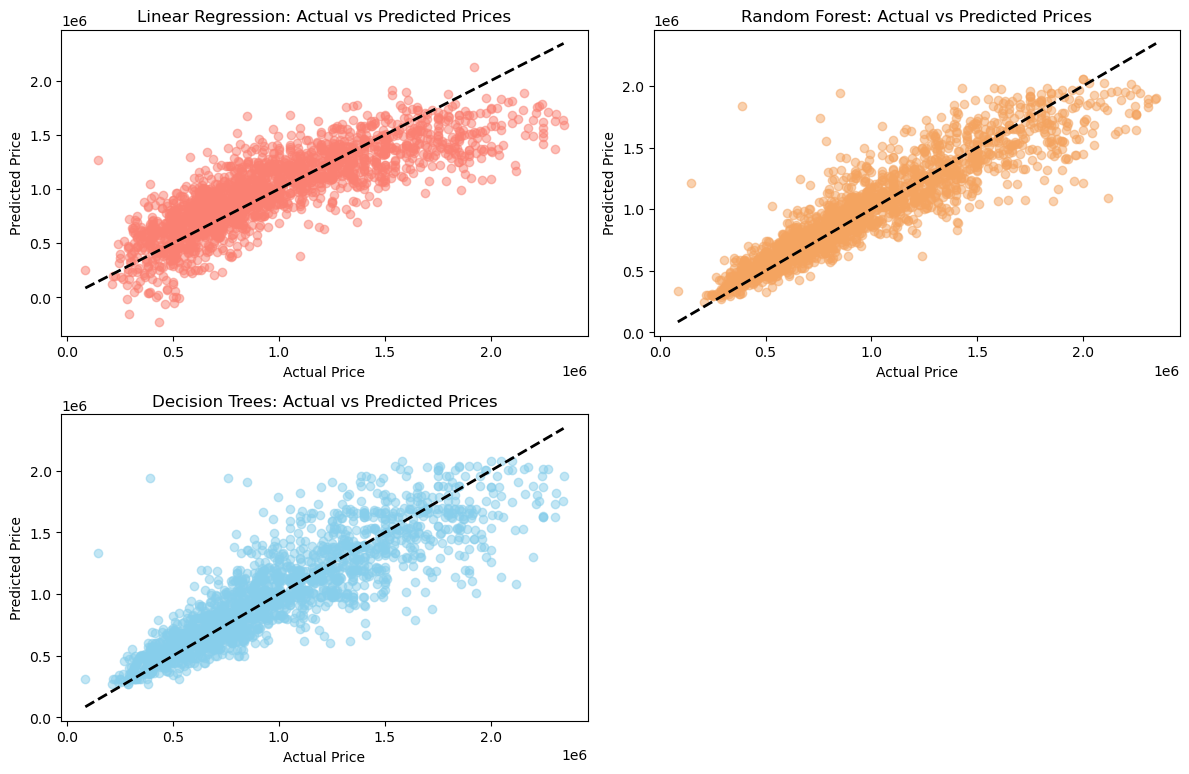

In [302]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test, models['Linear Regression'].predict(X_test), color='salmon', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(2, 2, 2)
plt.scatter(y_test, models['Random Forest'].predict(X_test), color='sandybrown', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(2, 2, 3)
plt.scatter(y_test, models['Decision Trees'].predict(X_test), color='skyblue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Trees: Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()
